<a href="https://colab.research.google.com/github/DivyamNigam/promt_image_finder/blob/main/Find_img_from_promt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Extracting Feattures from images**

In [1]:
!pip install tensorflow
!pip install keras

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications.vgg16 import VGG16
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from transformers import AlignProcessor, AlignModel, AutoTokenizer
from sklearn.metrics.pairwise import cosine_similarity
import requests
import torch
from PIL import Image
from transformers import AlignProcessor, AlignModel

In [18]:
# Load pre-trained ALIGN model and processor
processor = AlignProcessor.from_pretrained("kakaobrain/align-base")
model = AlignModel.from_pretrained("kakaobrain/align-base")
tokenizer = AutoTokenizer.from_pretrained("kakaobrain/align-base")

# Define a function to extract features from an image
def extract_image_features(img_path, model, processor, tokenizer):
    image = Image.open(img_path).convert('RGB') # Convert image to RGB format
    # Tokenize the dummy text (empty string in this case)
    inputs = processor(text="", images=image, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    # Access the image embeddings directly from the outputs and squeeze to 2D
    features = outputs.image_embeds.squeeze().detach().numpy()  # Changed line
    return features

# Load images and extract features
image_folder = '/content/photos'
image_features = {}
for filename in os.listdir(image_folder):
    img_path = os.path.join(image_folder, filename)
    # Pass the tokenizer to the feature extraction function
    image_features[filename] = extract_image_features(img_path, model, processor, tokenizer)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2778: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


**Extracting features from prompt and finding Cosine Similarity**

In [4]:
!pip install transformers
!pip install sentence-transformers
!pip install --upgrade transformers
!pip install nltk gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [5]:
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from transformers import AlignProcessor, AlignModel, AutoTokenizer
from sklearn.metrics.pairwise import cosine_similarity
import requests
import torch
from PIL import Image
from transformers import AlignProcessor, AlignModel

Enter a description of the photo: dogs


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2778: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


Top 5 matching photos: ['Stanley-Friends-cropped.jpg', '1457107485-gettyimages-512366437.jpg']


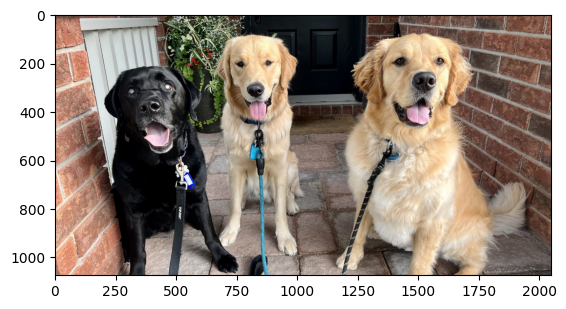

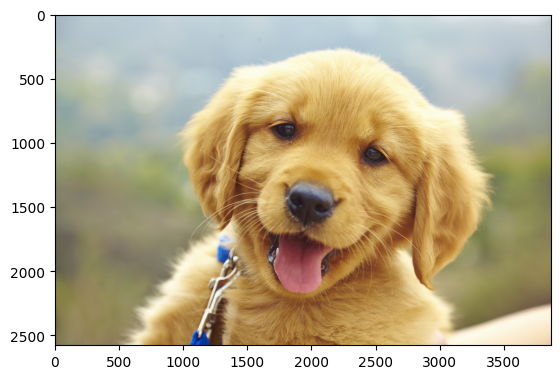

In [24]:
# Define a function to extract features from text
def extract_text_features(text, model, processor):
    # Create a dummy image for text-only input
    dummy_image = Image.new('RGB', (224, 224))
    inputs = processor(text=text, images=dummy_image, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    # Squeeze text features to 2D
    features = outputs.text_embeds.squeeze().detach().numpy()
    return features

# Define a function to find matching images based on text description
def find_matching_images(text, model, processor, image_features):
    text_features = extract_text_features(text, model, processor)
    similarities = {}
    for filename, features in image_features.items():
        similarity = cosine_similarity([text_features], [features])
        similarities[filename] = similarity
    top_5_filenames = sorted(similarities, key=similarities.get, reverse=True)[:2]
    return top_5_filenames

# Example usage
description = input("Enter a description of the photo: ")
top_5_photos = find_matching_images(description, model, processor, image_features)
print("Top 5 matching photos:", top_5_photos)

# Display the photos
photos_folder = 'photos'  # assumes the 'photos' folder is in the same directory as your notebook

for photo in top_5_photos:
    photo_path = os.path.join(photos_folder, photo)
    img = plt.imread(photo_path)
    plt.imshow(img)
    plt.show()